# Feature Importance - Decision Tree with XGBoost

I chose the decision tree model for the feature importance. The decision tree is good at showing what features are the most important for the model. The XGBoost helps the model with training because there are many features, which the XGBoost can handle well.

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('SHAP.csv') #this is the dataframe I made with the categorical values already encoded and only the features needed included
df = df.sample(n = 10000)
df.head()
df2 = df

In [5]:
pip install xgboost


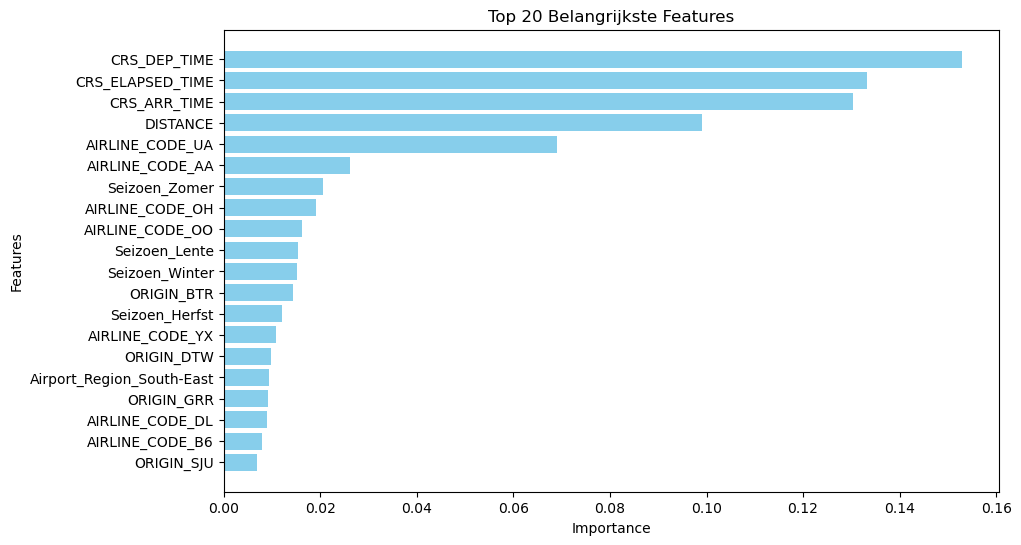

In [6]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
X = df2.drop(columns=["ARR_DELAY"])  
y = df2["ARR_DELAY"]                
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


top_features = feature_importance_df.head(20)


plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  
plt.title('Top 20 Belangrijkste Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Conclusion 
The decision tree shows that scheduled departure time, scheduled arrival time, scheduled flight time and flight distance are by far the most important feature that it uses. This means that those variables have, according to the decision tree, the most impact on flight delays. How big those impacts are absolutely, can be determined by the SHAP analysis in the next notebook.